# Khảo sát hàm trong Time-to-event (Survival) analysis

### BS. Lê Ngọc Khả Nhi

# Nhập đề

Trong phân tích diễn tiến thời gian/sự kiện hay còn gọi là phân tích sống còn, đối tượng khảo sát  là $T$, một biến ngẫu nhiên biểu thị cho kết quả đo đếm thời gian đã trôi qua cho đến khi khởi phát một biến cố $E$. $t$ là một giá trị quan sát được của $T$. 

Tử vong là một dạng biến cố đặc biệt và trong trường hợp đó $T$ còn được đặt tên là thời gian sống còn (survival time).

Bài này nhằm giới thiệu về 5 hàm quan trọng của phân tích Survival.

Tương tự những biến ngẫu nhiên trong lý thuyết xác suất, giá trị $t$ của $T$ được xác định bởi một hàm mật độ xác suất (PDF) và/hoặc một hàm mật độ xác suất tích lũy (CDF). 

#### Hàm PDF và CDF

$f(t)$ là hàm PDF của biến ngẫu nhiên $T$, nó cho biết mật độ xác suất để ghi nhận được một giá trị thời gian xác định $T = t_{i}$ 

$F(t)$ là hàm CDF của biến ngẫu nhiên $T$, nó cho biết xác suất để ghi nhận được một giá trị thời gian ngắn hơn hoặc bằng với một giá trị  $t_{i}$, 

Như vậy kết quả của F(t) chính là xác suất phát sinh biến cố $E$ tại thời điểm $t_{i}$. Xác suất này được xác định bằng diện tich dưới đường cong (AUC) của hàm PDF trong khoảng giữa $t=0$ và $t_{i}$

Ngoài ra, cho mục tiêu suy luận, phân tích thời gian - sự kiện còn khảo sát 3 hàm chuyên biệt sau đây:

####  Hàm nguy cơ (hazard function) $h(t)$, 
ước tính xác suất phát sinh biến cố $E$ trên mỗi đơn vị thời gian, trong khoảng thời gian $t$, Chú ý đây không phải là xác suất thực sự mà chỉ là tỉ lệ nhất thời (instantaneous incident rate) của biến cố $E$. Ý nghĩa của hàm nguy cơ tương tự như phép đo vận tốc của chuyển động trên hành trình mà đối tượng đang đi đến $E$. 

#### Hàm nguy cơ tích lũy $H(t)$  (cumulative hazard function) 
là toàn bộ nguy cơ của việc phát sinh biến cố $E$ mà đối tượng đã phải đối diện/trải qua trong khoảng thời gian $t$

#### Hàm Survival $S(t)$, 
ước tính xác suất quan sát được khoảng thời gian trải qua mà $E$ vẫn chưa phát sinh dài hơn $t$, hay xác suất chưa phát sinh biến cố $E$ tính đến thời điểm $t$. Đây cũng là diện tích dưới đường cong (AUC) của hàm PDF trong khoảng giữa thời điểm $t$ và tương lai vô cực $t = \infty$

## Định nghĩa toán học

Ta có thể định nghĩa hàm Survival và hàm CDF một cách dễ dàng như xác suất, giữa chúng cũng có liên hệ bổ sung cho nhau

Hàm Survival : $S(t) = P(T > t)$ 

Đây là xác suất ghi nhận được khoảng thời gian chưa phát sinh biến cố $E$ dài hơn một giá trị $t$, Trong phân tích sống còn mà E là tử vong hay 1 biến cố xấu, hàm Survival cho biết xác suất được an toàn/sống sót tại thời điểm $t$

Hàm CDF: $F(t) = P(T ≤ t)$ 

là xác suất ghi nhận được thời gian chưa phát sinh biến cố $E$ ngắn hơn hay bằng với giá trị $t$, trong bài toán phân tích sống còn là E là tử vong hay biến cố xấu, đây chính là xác suất tử vong hay phát sinh $E$ tại thời điểm $t$

Hàm PDF và hàm nguy cơ có thể định nghĩa bằng giới hạn:

$f(t) = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t)} {\Delta t}$ 

$h(t) = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t |T \ge t)} {\Delta t}$

Chú ý sự khác biệt duy nhất giữa hàm nguy cơ $h(t)$ và hàm PDF $f(t)$ : hàm $h(t)$ có điều kiện $T > t$ còn $f(t)$ thì không 

## Liên hệ giữa các hàm

Mỗi hàm trong danh sách trên có thể được xác định theo phương pháp tham số (lý thuyết, toán học) hoặc phi tham số (ước lượng từ dữ liệu thực nghiệm). Chú ý là phương pháp Kaplan-Meier thường dùng là một phương pháp phi tham số, vì vậy không khảo sát phân bố thực sự của $T$. 

Mặt khác giữa 5 hàm f,F,S,H,h có liên hệ chặt chẽ với nhau, nếu ta đã xác định được một hàm thì có thể suy ra những hàm còn lại.

Mối liên hệ giữa các hàm f, F, S, H, h là như sau:

$F(t) = 1 - S(t)$

$S(t) = 1 - F(t) = 1 - \int_0^t f(u)du = \int_t^\infty f(u)du$ 

$ f(t) = \frac {d} {dt} \{F(t)\} = \frac {d} {dt} \{1 - S(t)\} = - \frac {d} {dt} \{S(t)\}$ 

Như vậy f chính là slope của đồ thị hàm F và là đối nghịch của slope đồ thị hàm S

$ f(t) = \frac {d} {dt} \{F(t)\} = \lim_{\Delta t \to 0} \frac {F(t + \Delta t) - F(t)} {\Delta t} = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t)} {\Delta t}$

$F(t) = \int_0^t f(u)du$

$ h(t) = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t |T \ge t)} {\Delta t} = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t \cap T \ge t)} {\Delta t P(T \ge t)} = \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t)} {\Delta t S(t)} = \frac {1} {S(t)} \lim_{\Delta t \to 0} \frac {P(t \le T < t + \Delta t)} {\Delta t} = \frac {f(t)} {S(t)}$

Bộ phận điều kiện (conditional) của hàm h được phân tích nhờ định lý Bayes, và trở thành hàm S trong mẫu số, còn bộ phận giới hạn (limit) trở thành hàm PDF

Bộ phận xác suất:
 
$P(t \le T < t + \Delta t | T \ge t) = \frac {P([t \le T < t + \Delta t] \cap [T \ge t])} {P(T \ge t)} = \frac {P([t \le T < t + \Delta t])} {P(T \ge t)}$
 
Bộ phận $\cap [T \ge t]$ trở nên dư thừa và có thể loại bỏ. Mẫu số là hàm S

$ h(t) = \frac {f(t)} {S(t)} = \frac {1} {S(t)} \frac {d} {dt} \{F(t)\} = \frac {1} {S(t)} \frac {d} {dt} \{1 - S(t)\} = - \frac {1} {S(t)} \frac {d} {dt} \{S(t)\} = - \frac {d} {dt} log(S(t))$

Hàm nguy cơ h chính là đối nghịch của slope đồ thị logarit của hàm S

$H(t) = \int_0^t h(u)du = \int_0^t - \frac {d} {du} \{log(S(u))\} du = - log(S(t))$

$S(t) = e^{- H(t)} = e^{- \int_0^t h(u)du}$

$h(t) = \frac {d} {dt} \{H(t)\}$

$h(t) = \frac {f(t)} {S(t)} = \frac {f(t)} {1 - F(t)} = \frac {f(t)} {1 - \int_0^t f(u)du}$

$f(t) = h(t)S(t) = h(t)e^{- H(t)} = h(t)e^{- \int_0^t h(u)du}$

$S(t) = \frac {f(t)} {h(t)}$

## Khảo sát hàm

Trong bài này, chúng ta sẽ dùng ngôn ngữ Python để khảo sát hành vi của 5 hàm F,f,S,H,h nói trên trong những hoàn cảnh giả định khác nhau. Ta cần dùng 2 thư viện là numpy và scipy:

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Chuẩn bị các hàm h, S, F và f

In [2]:
# Hàm nguy cơ (h) tuyến tính và phi tuyến tính
def linear_hazard(t = 0, c = 0.5, h = 0):
    return c + h*t

def rise_fall_hazard(t = 0, scale = 2, shape = 1.5):
    return (shape / scale) * (t / scale)**(shape - 1) * np.exp(-1 * (t / scale)**shape)

# Hàm Survival (S)
def Survival(CH):
    return np.exp(-CH) # CH là kết quả của hàm nguy cơ tích lũy H

# Hàm PDF (f) và CDF (f) của thời gian T

def PDF(t, h):
    return Survival(t) * h # h là kết quả của hàm nguy cơ h

def CDF(S):
    return 1 - S # S là kết quả của hàm survival S

## Kịch bản thứ nhất: nguy cơ hằng định

Trong kịch bản này, hàm h là một hằng số, vì nguy cơ không thay đổi theo thời gian, thí dụ trong thực tế là nguy cơ tử vong do tai nạn ở người hoàn toàn khỏe mạnh, nguy cơ hư hỏng do lỗi của người dùng trên 1 thiết bị

$ h(t) = 0.5 + 0*t $

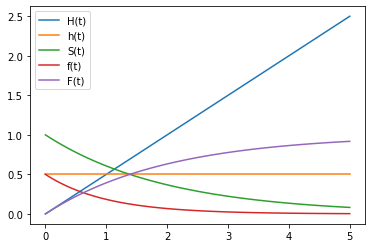

In [3]:
t = np.linspace(0,5,100)
    
h = linear_hazard(t, c = 0.5, h = 0)

CH =[]
for ti in t:
    CH.append(quad(func = lambda x: linear_hazard(t = x, c = 0.5, h = 0), a=0, b=ti))
    
CH = np.array([i[0] for i in CH])
S= Survival(CH)
pdf = PDF(t,h)
cdf = CDF(S)

plt.plot(t, CH, label = 'H(t)')
plt.plot(t, h, label = 'h(t)')
plt.plot(t, S, label = 'S(t)')
plt.plot(t, pdf, label = 'f(t)')
plt.plot(t, cdf, label = 'F(t)')
plt.legend()

## Kịch bản thứ 2: nguy cơ tăng dần đều

Trong kịch bản này, nguy cơ tăng một cách tuyến tính theo thời gian, thí dụ thực tế là nguy cơ tái phát bệnh của những bệnh nhân ung thư sau khi được điều trị khỏi bệnh

$ h(t) = 0 + 0.4*t $

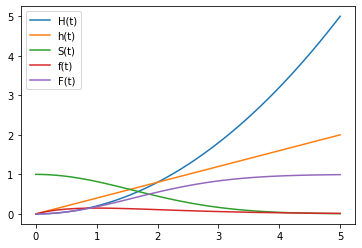

In [4]:
t = np.linspace(0,5,100)
    
h = linear_hazard(t, c = 0, h = 0.4)

CH =[]
for ti in t:
    CH.append(quad(func = lambda x: linear_hazard(t = x, c = 0, h = 0.4), a=0, b=ti))
    
CH = np.array([i[0] for i in CH])
S= Survival(CH)
pdf = PDF(t,h)
cdf = CDF(S)

plt.plot(t, CH, label = 'H(t)')
plt.plot(t, h, label = 'h(t)')
plt.plot(t, S, label = 'S(t)')
plt.plot(t, pdf, label = 'f(t)')
plt.plot(t, cdf, label = 'F(t)')
plt.legend()

## Kịch bản thứ 3: nguy cơ giảm dần đều

Trong kịch bản này, nguy cơ giảm dần một cách tuyến tính theo thời gian, thí dụ xác suất phát sinh biến cố hậu phẫu sau một can thiệp phẫu thuật

$ h(t) = 0.5 - 0.1*t $

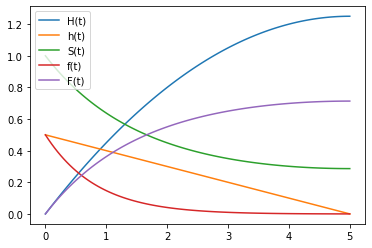

In [6]:
h = linear_hazard(t, c = 0.5, h = -0.1)

CH =[]
for ti in t:
    CH.append(quad(func = lambda x: linear_hazard(t = x, c = 0.5, h = -0.1), a=0, b=ti))
    
CH = np.array([i[0] for i in CH])
S= Survival(CH)
pdf = PDF(t,h)
cdf = CDF(S)

plt.plot(t, CH, label = 'H(t)')
plt.plot(t, h, label = 'h(t)')
plt.plot(t, S, label = 'S(t)')
plt.plot(t, pdf, label = 'f(t)')
plt.plot(t, cdf, label = 'F(t)')
plt.legend()

## Kịch bản thứ 4: nguy cơ tăng rồi giảm

Thí dụ: Nguy cơ tử vong sau khi nhiễm lao tăng trong những năm đầu tiên và giảm dần sau đó

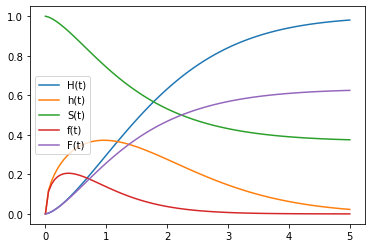

In [10]:
h = rise_fall_hazard(t, scale = 2, shape = 1.5)

CH =[]
for ti in t:
    CH.append(quad(func = lambda x: rise_fall_hazard(t = x, scale = 2, shape = 1.5), a=0, b=ti))
    
CH = np.array([i[0] for i in CH])
S= Survival(CH)
pdf = PDF(t,h)
cdf = CDF(S)

plt.plot(t, CH, label = 'H(t)')
plt.plot(t, h, label = 'h(t)')
plt.plot(t, S, label = 'S(t)')
plt.plot(t, pdf, label = 'f(t)')
plt.plot(t, cdf, label = 'F(t)')
plt.legend()

def fall_rise_hazard(t):
    return 0.2 * (t - 1.5)**2 + 0.1

## Kịch bản thứ 5: nguy cơ giảm rồi tăng

Đây là hiện tượng tử vong theo quy luật lão hóa bình thường của mọi loài sinh vật

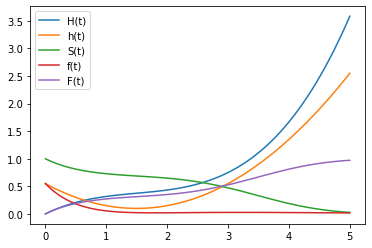

In [9]:
h = fall_rise_hazard(t)

CH =[]
for ti in t:
    CH.append(quad(func = lambda x: fall_rise_hazard(t = x), a=0, b=ti))
    
CH = np.array([i[0] for i in CH])
S= Survival(CH)
pdf = PDF(t,h)
cdf = CDF(S)

plt.plot(t, CH, label = 'H(t)')
plt.plot(t, h, label = 'h(t)')
plt.plot(t, S, label = 'S(t)')
plt.plot(t, pdf, label = 'f(t)')
plt.plot(t, cdf, label = 'F(t)')
plt.legend()

Tài liệu tham khảo: 

'Demonstration of survival curves with different hazard functions' sử dụng ngôn ngữ R của Kazuki Yoshida